In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
rec_date = session.query(func.max(measurement.date)).first()
rec_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

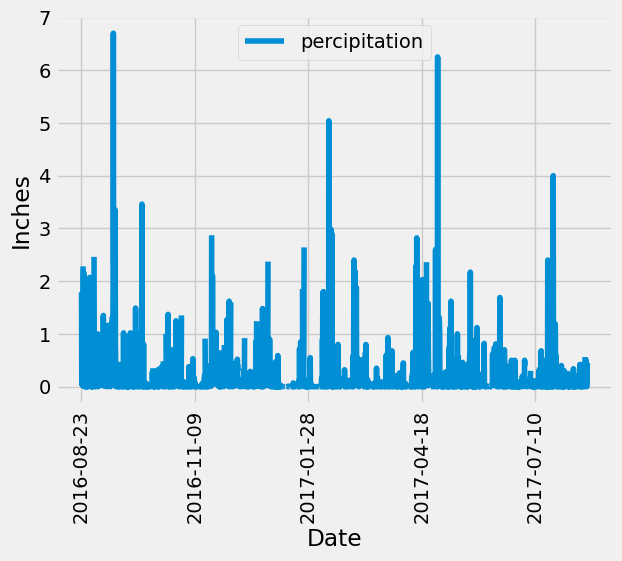

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23)- dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).filter(measurement.date>=one_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
PDF = pd.DataFrame(precip, columns = ["date", "percipitation"])

# Sort the dataframe by date
PDF = PDF.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
PDF.plot(x = "date", y = "percipitation", rot = 90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
PDF.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
calc = session.query(func.count(station.station)).all()
calc

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
id = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station=='USC00519281').all()
id

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

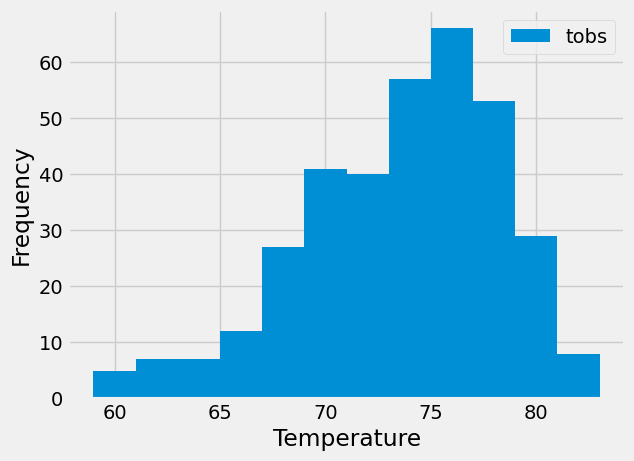

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year = dt.date(2017,8,23)- dt.timedelta(days = 365)
histo = session.query(measurement.tobs).filter(measurement.station=='USC00519281').\
filter(measurement.date >=one_year).all()

his_df = pd.DataFrame(histo, columns = ['tobs'])
his_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [22]:
# Close Session
session.close()